In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as st_m  
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 1:  Importing and analysing the data

In [4]:
#Importing data

bike_data = pd.read_csv('day.csv',index_col=False)
print(bike_data.shape)
bike_data.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Summary of the data

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Featues info

bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data Visualisation :: Visualising the Data

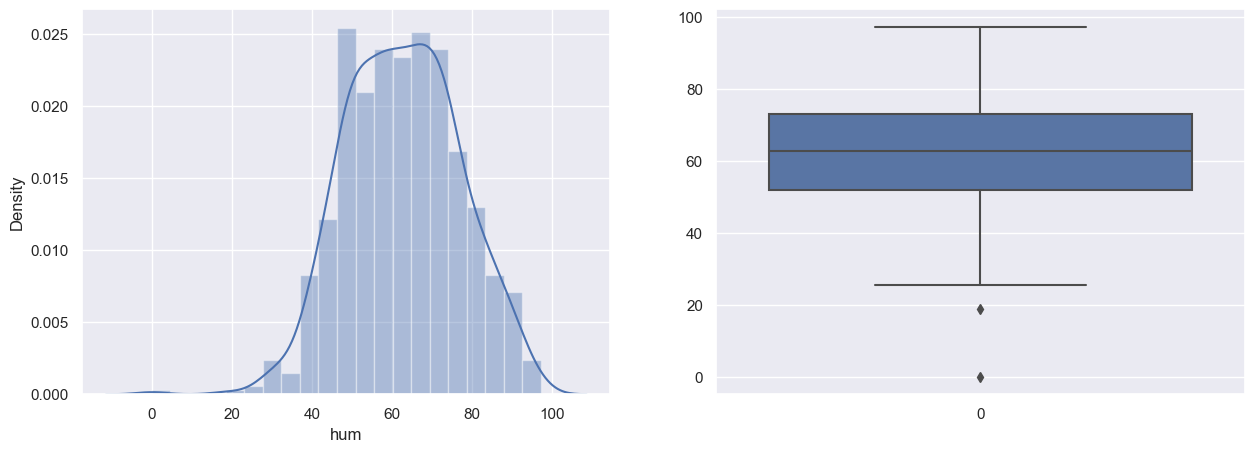

In [7]:
# Humidity Analysis

sns.set()
figure, axes = plt.subplots(1, 2,figsize=(15, 5))
sns.distplot(bike_data['hum'], ax=axes[0])
sns.boxplot(bike_data['hum'], ax=axes[1])
plt.show()

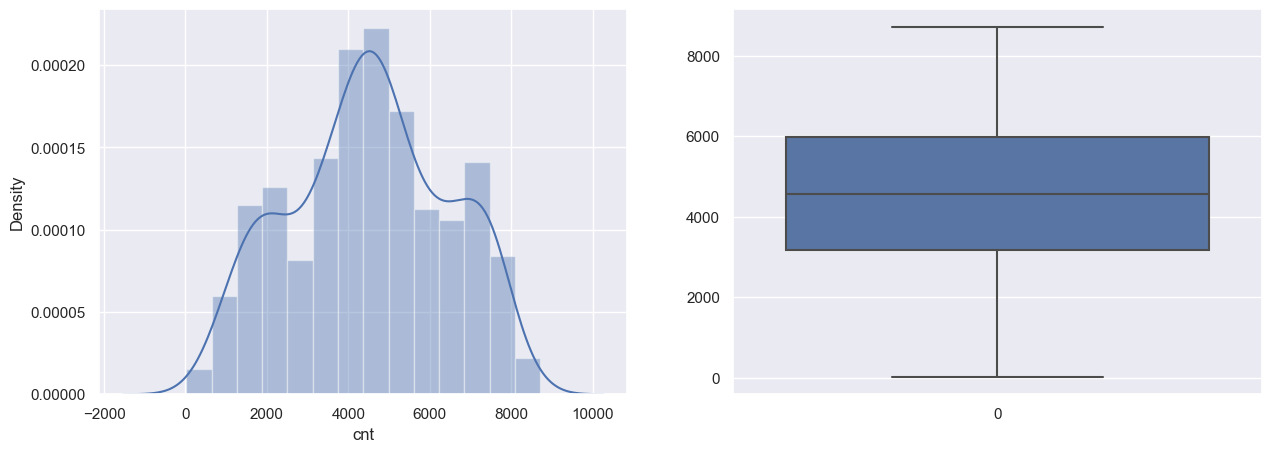

In [8]:
# Analysis of total rental bikes including both casual and registered 

sns.set()
figure, axes = plt.subplots(1, 2,figsize=(15, 5))
sns.distplot(bike_data['cnt'], ax=axes[0])
sns.boxplot(bike_data['cnt'], ax=axes[1])
plt.show()

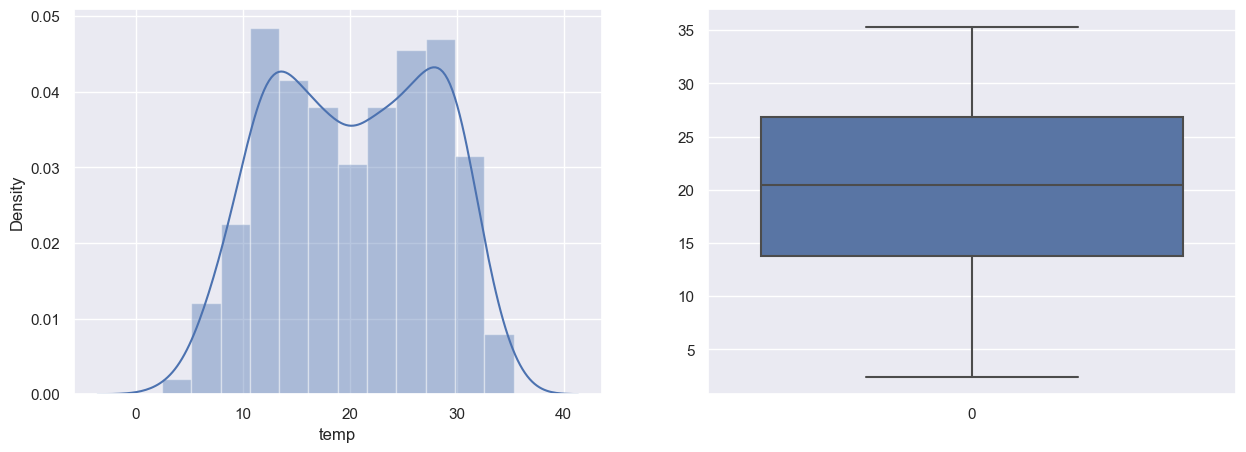

In [9]:
# Temperature Analysis 

sns.set()
figure, axes = plt.subplots(1, 2,figsize=(15, 5))
sns.distplot(bike_data['temp'], ax=axes[0])
sns.boxplot(bike_data['temp'], ax=axes[1])
plt.show()

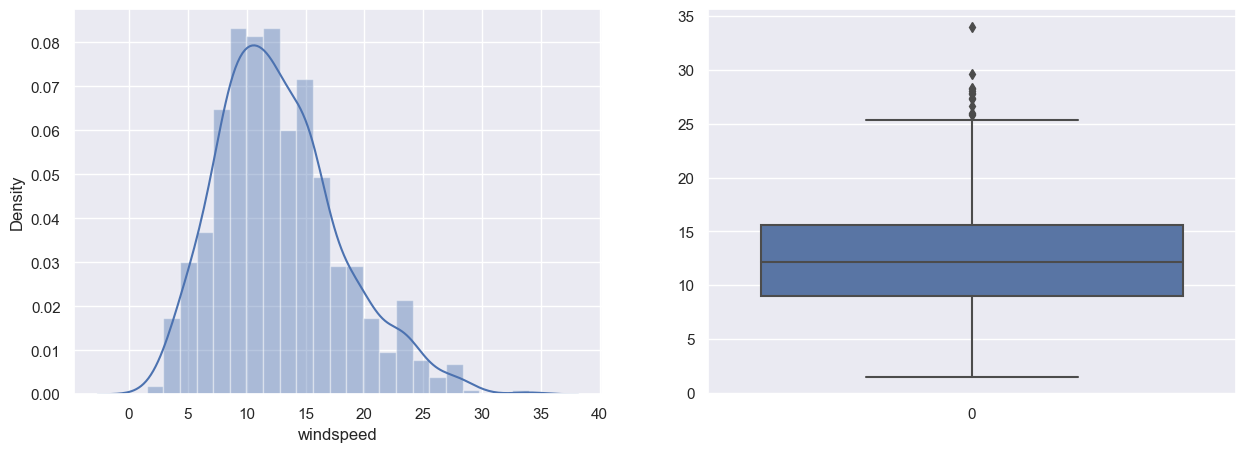

In [10]:
# Temperature Analysis 

sns.set()
figure, axes = plt.subplots(1, 2,figsize=(15, 5))
sns.distplot(bike_data['windspeed'], ax=axes[0])
sns.boxplot(bike_data['windspeed'], ax=axes[1])
plt.show()

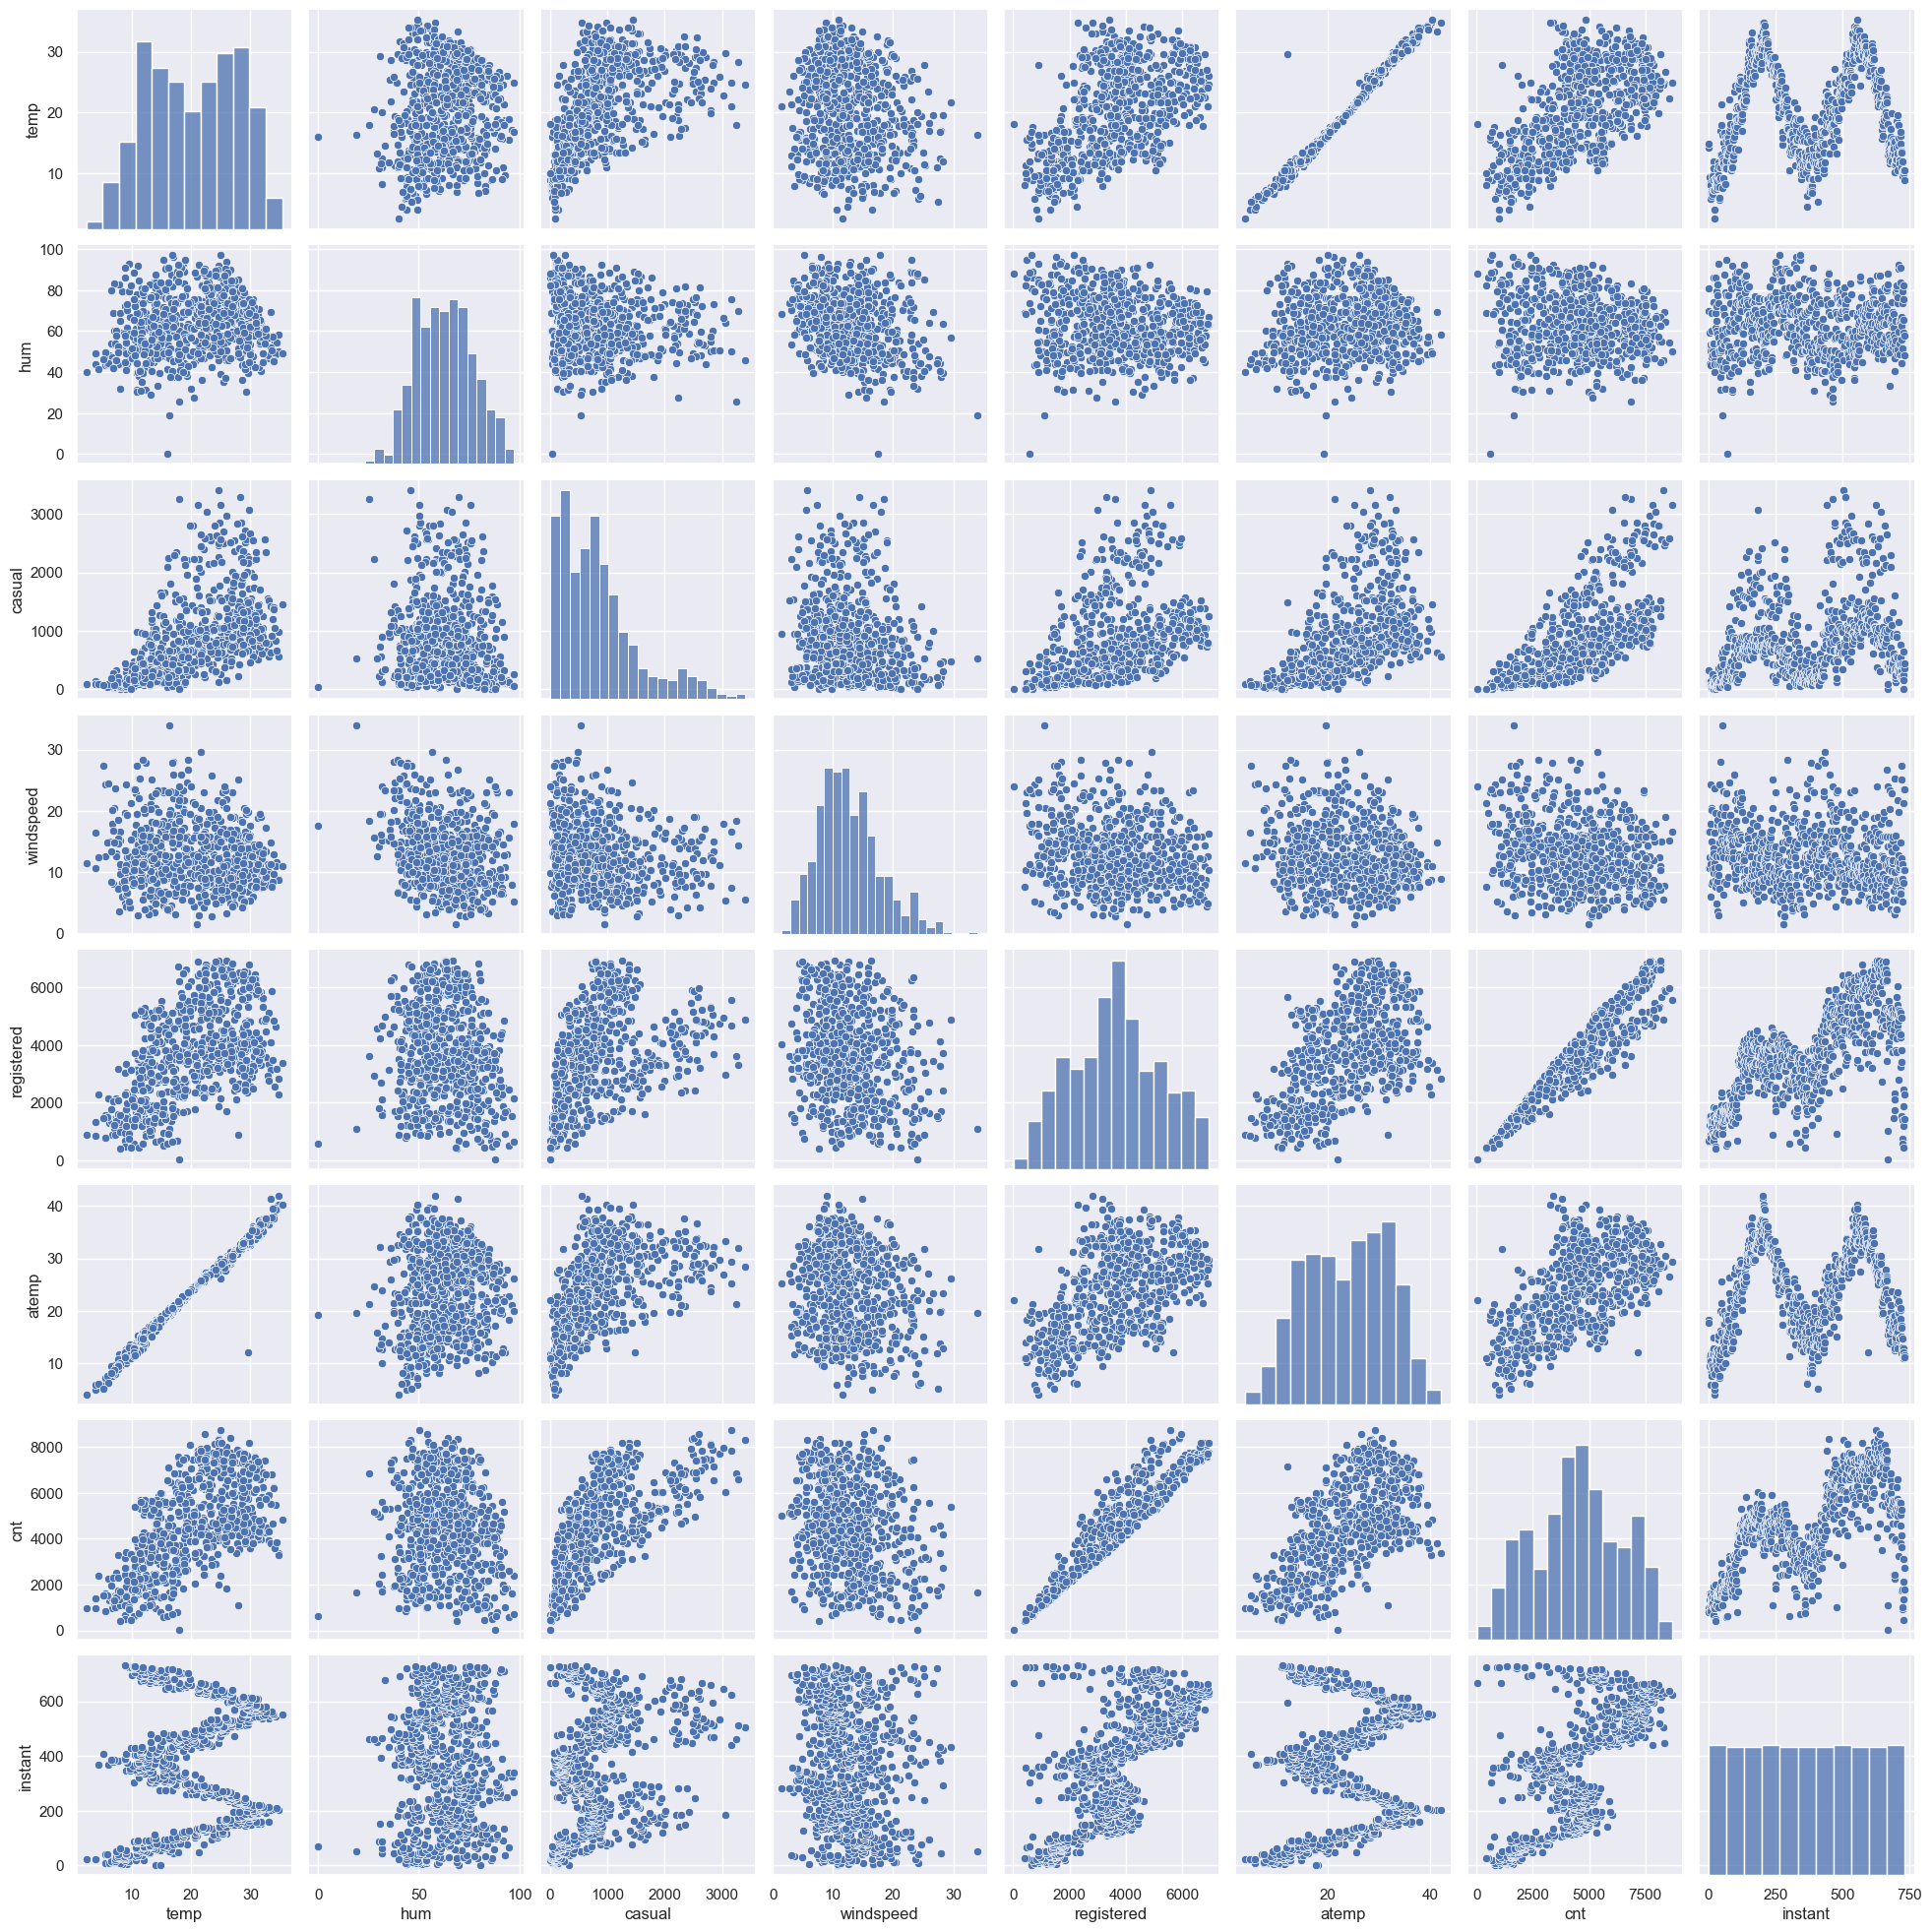

In [12]:
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(bike_data, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant'])
plt.show()

In [9]:
# Removing variables that are not required
varlist =  ['registered', 'casual', 'instant','atemp']
bike_data.drop(varlist, axis=1, inplace=True)

In [10]:
enc_cols =  { 
                   "weathersit":  {1: 'clear', 2: 'mist', 3: 'snow', 4: 'rain' },
                   "season"    :  {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'},
                   "weekday"   :  {0:'Sunday',1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'},
                   "yr"        :  {0: "2018", 1: "2019"},
                   "mnth"      :  {1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul', 8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}
                  }
bike_data["dteday"] = bike_data.dteday.astype('datetime64') 
bike_data.replace(enc_cols, inplace=True)

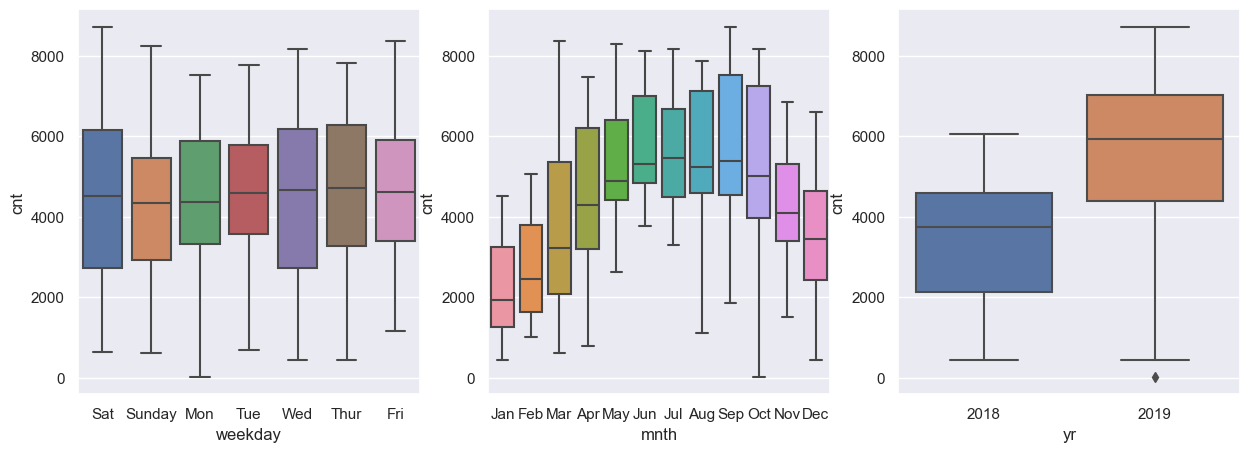

In [11]:
# Time related analysis

sns.set()
figure, axes = plt.subplots(1, 3,figsize=(15, 5))
sns.boxplot(bike_data, x='weekday', y='cnt', ax=axes[0])
sns.boxplot(bike_data, x='mnth', y='cnt',ax=axes[1])
sns.boxplot(bike_data, x='yr', y='cnt', ax=axes[2])

plt.show()

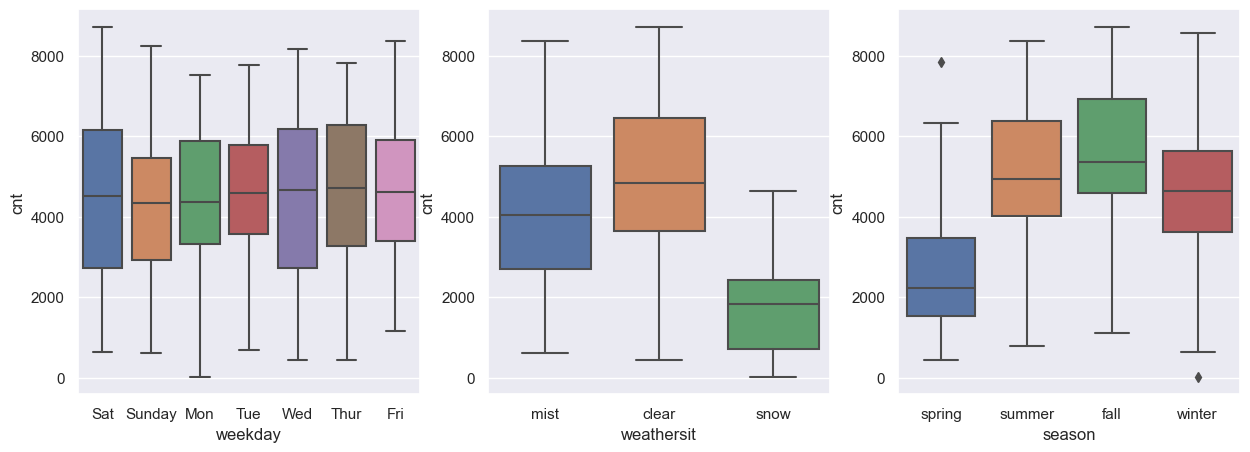

In [12]:
sns.set()
figure, axes = plt.subplots(1, 3,figsize=(15, 5))
sns.boxplot(bike_data, x='weekday', y='cnt', ax=axes[0])
sns.boxplot(bike_data, x='weathersit', y='cnt',ax=axes[1])
sns.boxplot(bike_data, x='season', y='cnt', ax=axes[2])

plt.show()

## Trend analysis:

### 1. We can see that there is a low trend in choosing bicycles during the spring, which also shows that the season is a good indicator of dependent variables.
### 2. We observe a tendency in the months, which may be related to the season and the weather. It means it is a reliable prediction.
### 3. It is evident that individuals prefer cars far less when it is snowing, and the weather is a good predictor of dependent variables.
### 4. Number of user increase as year increase. This is good sign of progress.

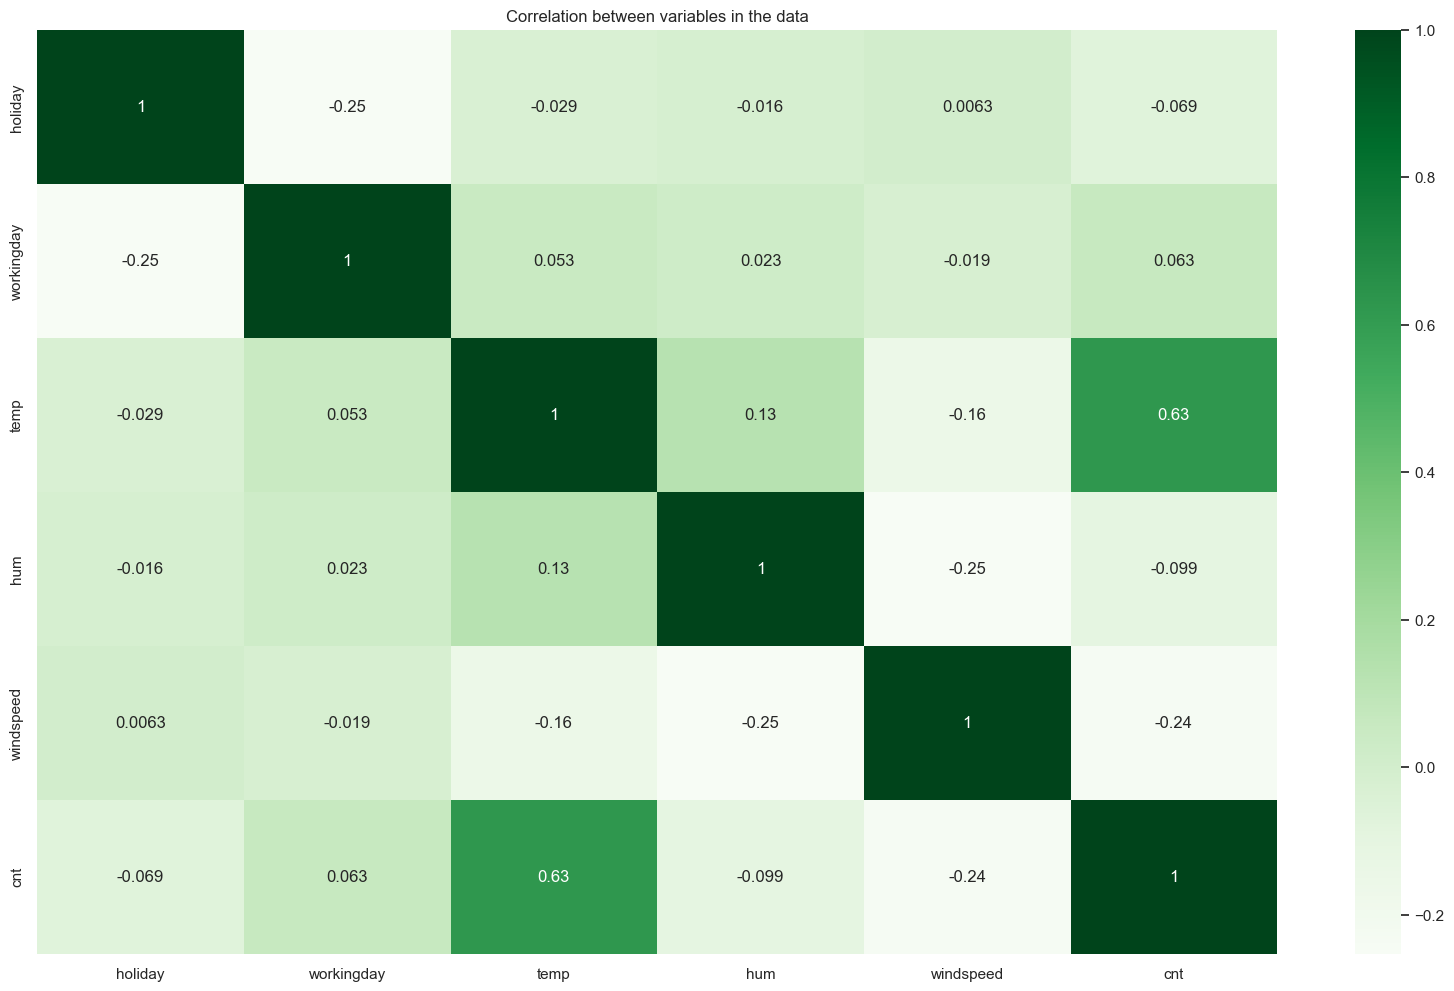

In [13]:
# Heatmap to find the correlation between the variables
plt.figure(figsize=(20, 12))
sns.heatmap(bike_data.corr(), cmap='Greens', annot=True)
plt.title('Correlation between variables in the data')
plt.show()

In [14]:
# Creating dummy variables for categorical variables

month = pd.get_dummies(bike_data.mnth, drop_first=True)
weekday = pd.get_dummies(bike_data.weekday, drop_first=True)
weather = pd.get_dummies(bike_data.weathersit, drop_first=True)
season = pd.get_dummies(bike_data.season, drop_first=True)
year = pd.get_dummies(bike_data.yr, drop_first=True)

bike_data = pd.concat([bike_data,month, weekday, weather, season, year], axis=1)
bike_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,...,Sunday,Thur,Tue,Wed,mist,snow,spring,summer,winter,2019
0,2018-01-01,spring,2018,Jan,0,Sat,0,mist,14.110847,80.5833,...,0,0,0,0,1,0,1,0,0,0
1,2018-02-01,spring,2018,Jan,0,Sunday,0,mist,14.902598,69.6087,...,1,0,0,0,1,0,1,0,0,0
2,2018-03-01,spring,2018,Jan,0,Mon,1,clear,8.050924,43.7273,...,0,0,0,0,0,0,1,0,0,0
3,2018-04-01,spring,2018,Jan,0,Tue,1,clear,8.200000,59.0435,...,0,0,1,0,0,0,1,0,0,0
4,2018-05-01,spring,2018,Jan,0,Wed,1,clear,9.305237,43.6957,...,0,0,0,1,0,0,1,0,0,0


In [15]:
bike_data.drop(['season','mnth','weathersit','weekday', 'yr', 'dteday'],axis=1,inplace=True)
bike_data.head(5)

,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,...,Sunday,Thur,Tue,Wed,mist,snow,spring,summer,winter,2019
0,0,0,14.110847,80.5833,10.749882,985,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,0,0,14.902598,69.6087,16.652113,801,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
2,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [16]:
data_train, data_test = train_test_split(bike_data, train_size=0.7, random_state=3)

## Step 5: Resacling the Data 

In [17]:
scaler = MinMaxScaler()
sc = ['temp', 'cnt','hum', 'windspeed']
data_train[sc] = scaler.fit_transform(data_train[sc])


## Step 5: Building model

In [18]:
# Dividing data into output and input
X_train = data_train
y_train = data_train.pop('cnt')

In [19]:
# Running RFE for feature selection
model = LinearRegression()
model.fit(X_train, y_train)

rfe = RFE(model, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [20]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 7),
 ('Feb', False, 9),
 ('Jan', False, 8),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', True, 1),
 ('May', False, 3),
 ('Nov', False, 6),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Mon', False, 2),
 ('Sat', True, 1),
 ('Sunday', True, 1),
 ('Thur', False, 14),
 ('Tue', False, 11),
 ('Wed', False, 12),
 ('mist', True, 1),
 ('snow', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', False, 4),
 ('2019', True, 1)]

In [ ]:
important_cols=X_train.columns[rfe.support_]
important_cols

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jul', 'Mar',
       'Oct', 'Sep', 'Sat', 'Sunday', 'mist', 'snow', 'spring', '2019'],
      dtype='object')

In [ ]:
X_train_RFE = X_train[important_cols]
X_train_RFE = st_m.add_constant(X_train_RFE)
stats_model = st_m.OLS(y_train,X_train_RFE).fit()  

In [ ]:
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.06e-189
Time:                        12:54:10   Log-Likelihood:                 508.91
No. Observations:                 510   AIC:                            -987.8
Df Residuals:                     495   BIC:                            -924.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3187      0.025     12.791      0.0

In [24]:
#calculating the VIF of the model
vif_score = pd.DataFrame()
X = X_train_RFE
vif_score['Variables'] = X.columns
vif_score['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_score['VIF'] = round(vif_score['VIF'], 2)

In [25]:
vif_score = vif_score.sort_values(by = 'VIF', ascending = False)
vif_score

,Variables,VIF
1,holiday,inf
2,workingday,inf
10,Sat,inf
11,Sunday,inf
3,temp,2.03
4,hum,1.89
14,spring,1.86
12,mist,1.59
6,Jul,1.29
13,snow,1.27


In [26]:
X = X_train_RFE.drop('workingday', axis=1)

In [27]:
stats_model_2 = st_m.OLS(y_train, X).fit()
stats_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.06e-189
Time:                        12:54:55   Log-Likelihood:                 508.91
No. Observations:                 510   AIC:                            -987.8
Df Residuals:                     495   BIC:                            -924.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4149      0.031     13.594      0.000       0.355       0.475
holiday       -0.0472      0.022     -2.136      0.033      -0.091      -0.004
temp           0.3940      0.025     15.959      0.000       0.346       0.443
hum           -0.1822      0.038     -4.793      0.000      -0.257      -0.107
windspeed     -0.1747      0.027     -6.403      0.000      -0.228      -0.121
Jul           -0.0506      0.018     -2.816      0.005      -0.086      -0.015
Mar            0.0580      0.015      3.762      0.000       0.028       0.088
Oct            0.0789      0.014      5.654      0.000       0.051       0.106
Sep            0.0672      0.016      4.229      0.000       0.036       0.098
Sat            0.0168      0.011      1.505      0.133      -0.005       0.039
Sunday        -0.0357      0.012     -2.953      0.003      -0.059      -0.012
mist          -0.0523      0.011     -4.873      0.000      -0.073      -0.031
snow          -0.2615      0.029     -9.107      0.000      -0.318      -0.205
spring        -0.1589      0.013    -12.622      0.000      -0.184      -0.134
2019           0.2345      0.008     28.690      0.000       0.218       0.251
==============================================================================
Omnibus:                       87.541   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.479
Skew:                          -0.859   Prob(JB):                     1.09e-49
Kurtosis:                       5.768   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.95
2,temp,2.03
3,hum,1.89
13,spring,1.86
11,mist,1.59
5,Jul,1.29
12,snow,1.27
4,windspeed,1.22
8,Sep,1.16
6,Mar,1.14


In [29]:
X.columns

Index(['const', 'holiday', 'temp', 'hum', 'windspeed', 'Jul', 'Mar', 'Oct',
       'Sep', 'Sat', 'Sunday', 'mist', 'snow', 'spring', '2019'],
      dtype='object')

In [30]:
X = X.drop('Sat', axis=1)
stats_model_3 = st_m.OLS(y_train, X).fit()
stats_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.23e-190
Time:                        12:55:19   Log-Likelihood:                 507.74
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4170      0.031     13.660      0.000       0.357       0.477
holiday       -0.0508      0.022     -2.307      0.021      -0.094      -0.008
temp           0.3937      0.025     15.926      0.000       0.345       0.442
hum           -0.1812      0.038     -4.763      0.000      -0.256      -0.106
windspeed     -0.1722      0.027     -6.316      0.000      -0.226      -0.119
Jul           -0.0494      0.018     -2.748      0.006      -0.085      -0.014
Mar            0.0580      0.015      3.753      0.000       0.028       0.088
Oct            0.0794      0.014      5.681      0.000       0.052       0.107
Sep            0.0674      0.016      4.234      0.000       0.036       0.099
Sunday        -0.0391      0.012     -3.283      0.001      -0.062      -0.016
mist          -0.0531      0.011     -4.942      0.000      -0.074      -0.032
snow          -0.2629      0.029     -9.150      0.000      -0.319      -0.206
spring        -0.1585      0.013    -12.576      0.000      -0.183      -0.134
2019           0.2344      0.008     28.640      0.000       0.218       0.250
==============================================================================
Omnibus:                       83.236   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.750
Skew:                          -0.807   Prob(JB):                     7.04e-49
Kurtosis:                       5.798   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.82
2,temp,2.03
3,hum,1.89
12,spring,1.86
10,mist,1.59
5,Jul,1.28
11,snow,1.27
4,windspeed,1.21
8,Sep,1.16
6,Mar,1.14


### Residual Analysis of the train data

In [33]:
y_train_count = stats_model_3.predict(X)

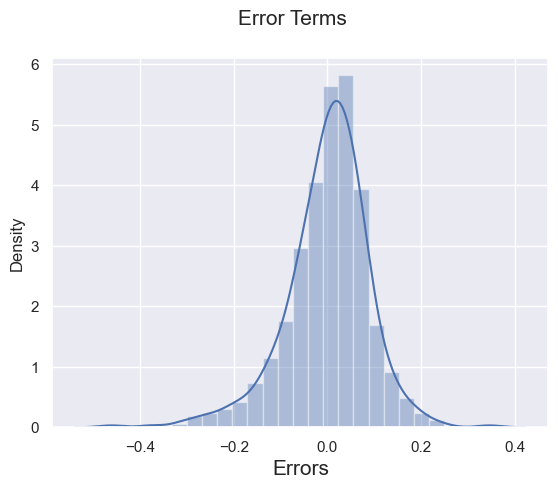

In [34]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 25)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 15) 
plt.show()

In [35]:
sc = ['temp', 'cnt','hum', 'windspeed','cnt']
data_test[sc] = scaler.fit_transform(data_test[sc])

In [36]:
X_test = data_test
y_test = data_test.pop('cnt')

In [37]:
X_train_new = X.drop(['const'], axis=1)
X_test_new = X_test[X_train_new.columns]

In [38]:
# Adding a constant variable 
X_test_new = st_m.add_constant(X_test_new)

In [39]:
# Making predictions
y_pred = stats_model_3.predict(X_test_new)

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(y_test, y_pred)

0.8204477999221481

## Summary:

### 1. The R-squared value of the model is 82.04%, suggesting that our model accurately and comprehensively describes the variance on the test set. As a result, we can say that the model is good.

### 2. We can infer that the temperature and whether it is a working day or not affect the bike needs for the BoomBikes company. 

### 3. In addition, it appears that demand for rentals is higher in the winter than it is in the summer and spring. We had seen that rental activity was increased in September and October. The focus was mostly on holidays rather than days like Wednesday, Thursday, and Saturday.

### 4. According to one of the recommendations based on this model, extensive marketing should be done in the spring and summer to increase rental rates.

### 5. A solid marketing plan for the first six months of the year can help increase rental rates because the summertime also exhibits low rental levels. 

### 6. On days when the weather is less clear, there must be a strategy to introduce more users, possibly with rewards or clever bargains. 

### 7. Rentals increased in 2019 compared to 2018, which shows that more people will become aware of this concept over time. To keep repeat clients, a thorough study must be conducted.